#画面のチェック
　最初に画面チェックするためのノートブックです。

　手順に沿ってやってみましょう。

　最終更新日　２０１９年１２月１１日

#program install
必要なプログラムをインストールします。数十秒で終了します。

In [1]:
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install pyvirtualdisplay

#パラメータの作成


In [0]:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument('--env', type=str, default='Breakout-ram-v0')
parser.add_argument('--outdir', type=str, default='result')
parser.add_argument('--save_mp4', type=str, default='test.mp4')
args = parser.parse_args([])

#パラメータ設定
パラメータを設定します。

In [0]:
#@title Configuration
args.outdir="result" #@param{type:"string"}
args.env = "Breakout-ram-v0" #@param ["Breakout-ram-v0","Acrobot-v1","Pendulum-v0","CartPole-v0","MountainCar-v0"]{allow-input: true}
args.save_mp4=args.outdir+'/pretrain.mp4'#@param{type:"string"}

import os
if not os.path.exists(args.outdir):
    os.makedirs(args.outdir)


##Evaluation
1回試行した結果が表示されます。動画は、outdir+'/pretrain.mp4'に出力されます。

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


test episode:1 R: 1.0


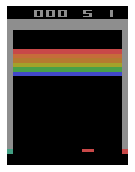

In [4]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
%matplotlib inline

from IPython.display import HTML
from matplotlib import animation
import matplotlib.pyplot as plt
import gym
env = gym.make(args.env)

frames = []
obs = env.reset()
done = False
R = 0
t = 0
while not done and t < 2000:
  frames.append(env.render(mode = 'rgb_array'))
  action = env.action_space.sample()
  obs, r, done, _ = env.step(action)
  R += r
  t += 1
print('test episode:1',  'R:', R)
env.close()

plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),dpi=72)
patch = plt.imshow(frames[0])
plt.axis('off') 
def animate(i):
  patch.set_data(frames[i])
anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),interval=50)
anim.save(args.save_mp4)
HTML(anim.to_jshtml())